In [1]:
with open("finaldata.txt", encoding = 'UTF-8') as f:
    data = f.read()

In [2]:
chunks = data.split('\n\n')
chunks = [c for c in chunks if len(c) > 3]

In [3]:
def parse_chunk(chunk):
    chunk = chunk.strip()
    lines = chunk.split("\n")

    #Basic extraction
    username = lines[0]
    try:
        #Extract and clean numeric fields
        post = int(lines[1].split(" post")[0].replace(",",""))
        followers = float(lines[2].split(" follower")[0].replace(",","").replace("K","").replace("M",""))
        if("K" in lines[2]):
            followers = int(followers*1000)
        elif("M" in lines[2]):
            followers = int(followers*1000000)
        else:
            followers = int(followers)
        following = float(lines[3].split(" following")[0].replace(",","").replace("K","").replace("M",""))
        if("K" in lines[3]):
            following = int(following*1000)
            following = int(following)
        elif("M" in lines[3]):
            following = int(following*1000000)
            int(following)
        else:
            following = int(following)    
    
        name = lines[4]

        #Handle varying line lengths for category and Bio
        if(len(lines) > 5):
            type_of_page = lines[5]
            bio = "\n".join(lines[6:]) if len(lines) > 6 else ""
        else:
            type_of_page = "Unknown"
            bio = ""
    
        return {"username": username,"posts": post,"followers": followers,"following": following,"name": name,"type_of_page": type_of_page,"bio":bio}
    except(IndexError, ValueError) as e:
        print(f"Error parsing chunk for {username}: {e}")
        return None

In [4]:
all_chunks = []
for chunk in chunks:
    parsed_chunk = parse_chunk(chunk)
    all_chunks.append(parsed_chunk) 

In [5]:
import json
s = json.dumps(all_chunks, indent = 4)
with open("data.json","w") as f:
    f.write(s)

# Who has the maximum posts ?


In [6]:
max = 0
for chunk in all_chunks:
     if(max < chunk["posts"]):
         max = chunk["posts"]
         chunk_with_max_post = chunk
print(chunk_with_max_post["username"])

startuphub_blr


# Who has the maximum followers ?

In [7]:
max = 0
for chunk in all_chunks:
     if(max < chunk["followers"]):
         max = chunk["followers"]
         chunk_with_max_followers = chunk
print(chunk_with_max_followers["username"])

_anujsinghal


# Who follows maximum people?

In [8]:
max = 0
for chunk in all_chunks:
     if(max < chunk["following"]):
         max = chunk["following"]
         chunk_with_max_following = chunk
print(chunk_with_max_following["username"])

bangalore_tech_bro


# How many categories?

In [9]:
categories = set()
for chunk in all_chunks:
    categories.add(chunk["type_of_page"])
print(categories, f"\nThere are {len(categories)} categories")

{'Educator', 'Nonprofit organization', 'Software Engineer', 'Product Manager', 'Writer', 'Data Science', 'Design', 'Media', 'Entrepreneur', 'Cafe Explorer', 'Investor', 'Community', 'Digital creator', 'Engineer', 'Recruiter', 'Lifestyle', 'Developer', 'Comedy', 'Tech', 'Public Figure', 'Backend Developer', 'Tech Creator', 'Blog', 'Coder', 'Personal Blog', 'Blogger', 'Data Scientist', 'Food & Drink', 'Founder', 'Full-stack Dev', 'Education', 'Cafe Nerd', 'Frontend Dev', 'Artist + Coder'} 
There are 34 categories


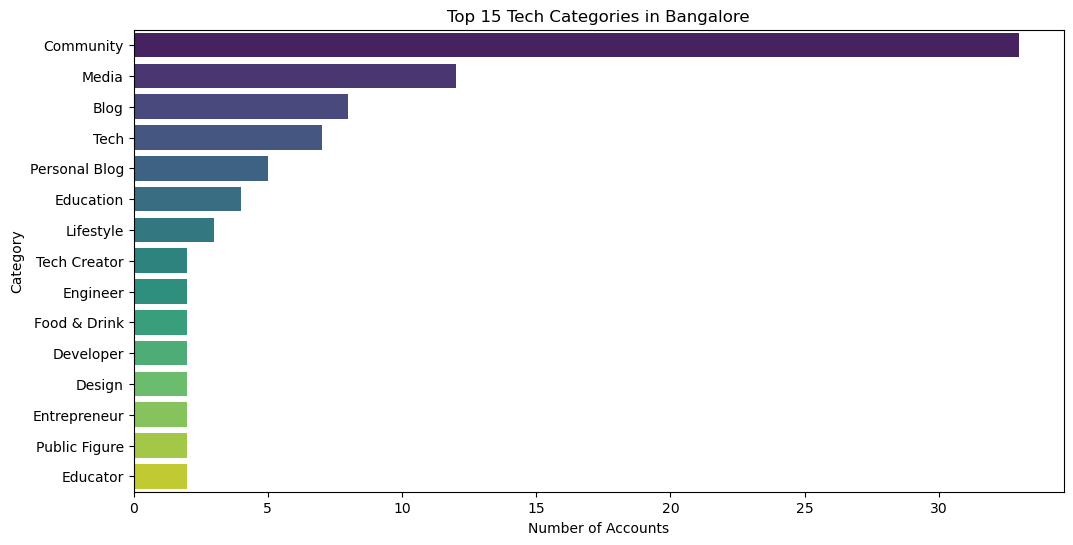

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Filter out None values and get category list
valid_chunks = [c for c in all_chunks if c is not None]
category_counts = Counter([c['type_of_page'] for c in valid_chunks])

# Sort and take top 15 for a clean chart
top_categories = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True)[:15])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_categories.values()), y=list(top_categories.keys()), hue = list(top_categories.keys()), palette="viridis", legend = False)
plt.title("Top 15 Tech Categories in Bangalore")
plt.xlabel("Number of Accounts")
plt.ylabel("Category")
plt.show()